# C55 - NLP Case Study - Automatic Ticket Classification

**Group Facilitator:**
- **Name:** Mohammed AbuSaleha
- **Email ID:** mabusaleha@yahoo.com
- **Phone No:** 919880118997

**Team Member Detail:**
- **Name:** SHRINIVAS NANDKISHOR DHAMONE
- **Email ID:** shrinivas.d33@gmail.com
- **Phone no:** 919823352202


## Problem Statement 
We need to build a model that is able to classify customer complaints based on the products/services. By doing so, we can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

We will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, we need to apply NMF to analyze patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 

With the help of topic modelling, we will be able to map each ticket onto its respective department/category. We can then use this data to train any supervised model such as logistic regression, decision tree, or random forest. Using this trained model, we can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

We shall perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
# Import necessary libraries
import json  # For working with JSON data
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions
import spacy  # For advanced natural language processing tasks
import string  # For string operations

# Download the English language model for spaCy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Data visualization libraries
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and charts


# Python library for working with human language data
import nltk  # Import the Natural Language Toolkit library
nltk.download('stopwords')  # Download the stopwords dataset from NLTK
from nltk.stem import WordNetLemmatizer  # Import the WordNet Lemmatizer module for lemmatization
from nltk.corpus import wordnet, stopwords  # Import WordNet and stopwords modules from NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# Plotly libraries for interactive visualizations
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Feature extraction and transformation libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Pretty print library
from pprint import pprint

# Command to display matplotlib plots inline in Jupyter Notebook
%matplotlib inline

# progress bar for loops and other iterable processes
from tqdm import tqdm 

#Warning handlings
import warnings as warnings  # Import the warnings module and alias it as "warnings"
warnings.filterwarnings("ignore")  # Filter out warnings to ignore them during runtime

#Set max col width and display
pd.set_option('display.max_colwidth', 350)
pd.set_option('display.max_columns', None)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrinivasd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrinivasd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shrinivasd/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrinivasd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
# Opening JSON file 
file_path = open('/Users/shrinivasd/#Upgrad/5_NLP/#CaseStudy/complaints-2021-05-14_08_16.json')  
# Returns JSON object as a dictionary 
data = json.load(file_path)
df = pd.json_normalize(data)

## Data preparation

In [3]:
# Inspect the dataframe to understand the given data.
# Set pandas option to display all columns without truncation
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


### <span style="color:navy">Observation:</span>

- JSON file converted into DataFrame and read successfully. 
- Had a glance at the data.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [5]:
# Print the column names
def print_column_names():
    i = 1
    for col in df.columns:
        print(str("{:02d}".format(i)) +" Col:\033[1m", col, '\033[0m')
        i += 1
        
print_column_names()

01 Col: _index 
02 Col: _type 
03 Col: _id 
04 Col: _score 
05 Col: _source.tags 
06 Col: _source.zip_code 
07 Col: _source.complaint_id 
08 Col: _source.issue 
09 Col: _source.date_received 
10 Col: _source.state 
11 Col: _source.consumer_disputed 
12 Col: _source.product 
13 Col: _source.company_response 
14 Col: _source.company 
15 Col: _source.submitted_via 
16 Col: _source.date_sent_to_company 
17 Col: _source.company_public_response 
18 Col: _source.sub_product 
19 Col: _source.timely 
20 Col: _source.complaint_what_happened 
21 Col: _source.sub_issue 
22 Col: _source.consumer_consent_provided 


### <span style="color:navy">Observation:</span>

- Total rows: 78313
- Total columns: 22
- Null values: Few of the columns contain null values
- Column names: Most of the column names start with '_', which we will rename to improve readability and usability.


In [6]:
# Assign new column names
new_columns = {}
for col in df.columns:
    new_columns[col] = re.sub("^_", "", col).replace("source.", "")

df.rename(columns = new_columns, inplace = True)

print_column_names()

01 Col: index 
02 Col: type 
03 Col: id 
04 Col: score 
05 Col: tags 
06 Col: zip_code 
07 Col: complaint_id 
08 Col: issue 
09 Col: date_received 
10 Col: state 
11 Col: consumer_disputed 
12 Col: product 
13 Col: company_response 
14 Col: company 
15 Col: submitted_via 
16 Col: date_sent_to_company 
17 Col: company_public_response 
18 Col: sub_product 
19 Col: timely 
20 Col: complaint_what_happened 
21 Col: sub_issue 
22 Col: consumer_consent_provided 


In [7]:
# Get the shape and size of the dataset
print('#rows:\033[1m', df.shape[0], '\033[0m')
print('#cols:\033[1m', df.shape[1], '\033[0m')

#rows: 78313 
#cols: 22 


In [8]:
# Assign nan in place of blanks in the complaints column
df.complaint_what_happened.replace(r'', np.nan, regex=True, inplace=True)

In [9]:
# Remove all rows where complaints column is nan
df = df[df.complaint_what_happened.notna()]
print('#Remaining Rows:\033[1m', len(df), '\033[0m')

#Remaining Rows: 21072 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21072 entries, 1 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      21072 non-null  object 
 1   type                       21072 non-null  object 
 2   id                         21072 non-null  object 
 3   score                      21072 non-null  float64
 4   tags                       3816 non-null   object 
 5   zip_code                   16427 non-null  object 
 6   complaint_id               21072 non-null  object 
 7   issue                      21072 non-null  object 
 8   date_received              21072 non-null  object 
 9   state                      20929 non-null  object 
 10  consumer_disputed          21072 non-null  object 
 11  product                    21072 non-null  object 
 12  company_response           21072 non-null  object 
 13  company                    21072 non-null  object 


### <span style="color:navy">Observation:</span>

- The shape and size of the dataset
    - No of rows initially: **78313**
    - No of cols: **22**
- Rows after complaint_what_happened nan removed
    - Remaining Rows: **21072**


## Prepare the text for topic modeling

We have removed all the blank complaints, we need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once we have done these cleaning operations we shall perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [11]:
# Function to clean the text and remove all the unnecessary elements.
def cleaned_text(sentence):
    # Convert the text to lowercase
    sentence = sentence.lower()

    # Remove text in square brackets
    sentence = re.sub("[\[].*?[\]]", "", sentence)
    
    # Remove punctuation
    sentence = re.sub(r'[^\w\s]','', sentence)
    
    # Remove digits
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    
    # Return the cleaned sentence
    return sentence


In [12]:
# Function to Lemmatize the texts

# Create a set of English stopwords
stop = set(stopwords.words('english'))


# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()  


# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):    #indicates that the word is an adjective.
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):  #indicates that the word is a verb
        return wordnet.VERB
    elif nltk_tag.startswith('N'):  #indicates that the word is a noun
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):  #indicates that the word is an adverb
        return wordnet.ADV
    else:          
        return None

def lemmatized_text(sentence):
    # tokenize into words
    words = nltk.word_tokenize(sentence)
    
    # remove stop words (this is optional but generally done)
    words = [word for word in words if word not in stopwords.words("english")]
    
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(words)
    
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [13]:
# Dataframe('df_clean') will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()

for x in tqdm(df.complaint_what_happened):
    df_clean = df_clean._append({'complaint_what_happened':x, 'lemmatized_complaints':lemmatized_text(cleaned_text(x))}, ignore_index=True)

100%|█████████████████████████████████████| 21072/21072 [50:24<00:00,  6.97it/s]


In [14]:
df_clean.head(10)

,complaint_what_happened,lemmatized_complaints
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,grand son give check deposit chase account fund clear chase bank close account never pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase
5,Can you please remove inquiry,please remove inquiry
6,With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direc...,notice jp morgan chase restrict account debit card tuesday xxxx thursday xxxx go branch advise customer service representative account would actually close go branch see remove fund currently well direct deposit place employment would return bank associate customer service representative assure fund would post may take additional business day s...
7,"During the summer months, I experience a decline income due to my employment. Therefore, I request a one month payment extension with my Auto Loan Company, Chase. For the past almost fours years, my request for p

### <span style="color:navy">Observation:</span>

- `nltk_tag_to_wordnet_tag` function converted NLTK POS tags to WordNet POS tags, for properly lemmatize words
- `lemmatized_text` Tokenized the sentence into words, removed stopwords, and tagged token with POS tag 
-  Lemmatized tokens are joined together to form a lemmatized sentence.
-  df_clean is created which contains only the complaints and the lemmatized complaints 

In [15]:
from textblob import TextBlob

tqdm.pandas()

# Write your function to extract the POS tags 
def extract_pos_tag(sentence):
    # Create a textblob object
    blob = TextBlob(sentence)
    
    # extract words with tags 'NN', join them and return
    return ' '.join([ word for (word,tag) in blob.tags if tag == "NN"])
    
df_clean["complaint_POS_removed"] = df_clean.progress_apply(lambda x: extract_pos_tag(x.lemmatized_complaints), axis=1)
df_clean["complaint_length"] = df_clean.progress_apply(lambda x: len(x.complaint_POS_removed), axis=1)

100%|██████████████████████████████████| 21072/21072 [00:00<00:00, 54794.12it/s]


### <span style="color:navy">Observation:</span>

- `textblob` module, used for part-of-speech tagging
-  `extract_pos_tag` extracted nouns (words with POS tag 'NN') from each sentence. 
- New column named `"complaint_POS_removed"` created containing the extracted nouns for each complaint.
- new column named `"complaint_length" stores the complaint_length of the `"complaint_POS_removed"` column

In [16]:
# The clean dataframe should now contain the raw complaint, lemmatized complaint 
# and the complaint after removing POS tags.
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,grand son give check deposit chase account fund clear chase bank close account never pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase,son check deposit chase account fund bank account money son check money bank refuse pay money son call time check owner country time date number claim number chase,163
...,...,...,...,...
210

### <span style="color:navy">Observation:</span>

- Clean dataframe now contains the raw complaint, lemmatized complaint, complaint after removing POS tags and lenght of complaint_POS_removed column .

## Exploratory data analysis to get familiar with the data.

*   Visualise the data according to the 'Complaint' character complaint_length.
*   Using a word cloud we shall find the top 40 words by frequency among all the articles after processing the text.
*   We will find the top unigrams, bigrams and trigrams by frequency among all the complaints after processing the text.

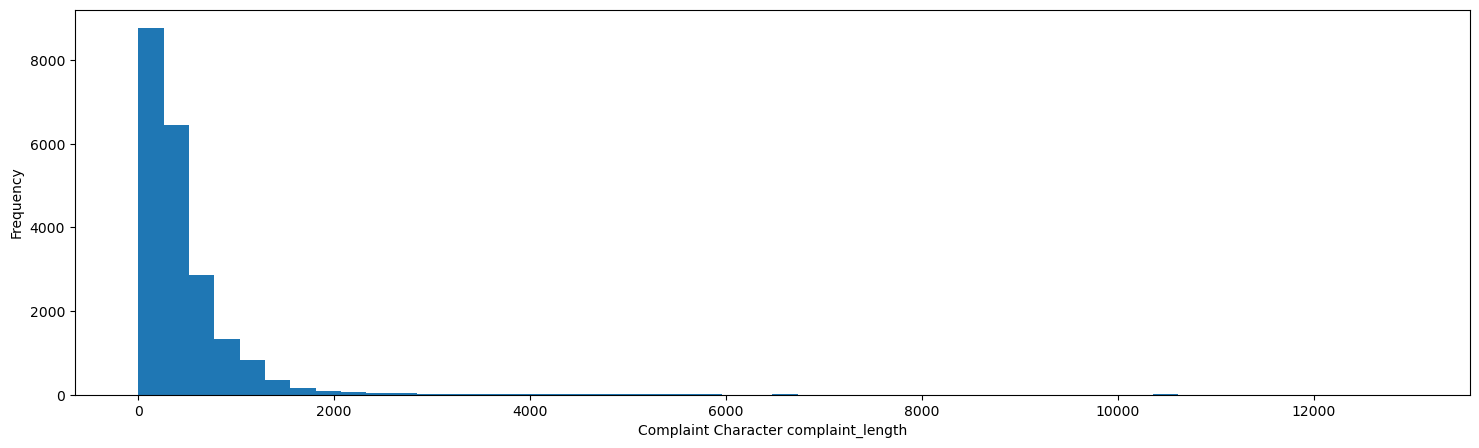

In [17]:
# Code to visualise the data according to the 'Complaint' character complaint_length
plt.figure(figsize=(18,5))
plt.hist(df_clean.complaint_length, bins=50)
plt.xlabel("Complaint Character complaint_length")
plt.ylabel("Frequency")
plt.show()

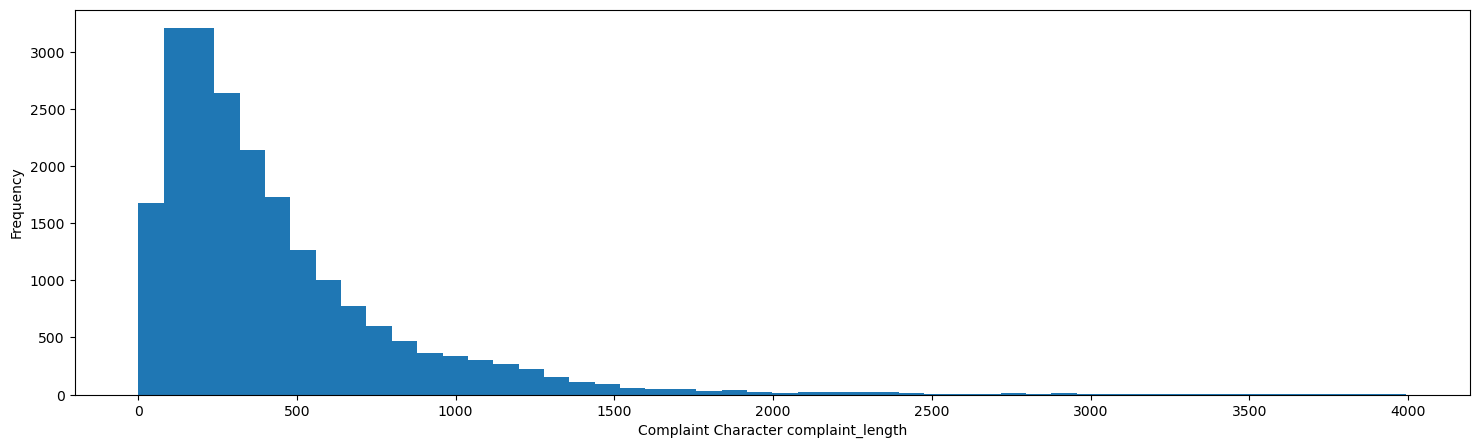

In [18]:
# Zoomed to see the figure upto 4000
plt.figure(figsize=(18,5))
plt.hist([l for l in df_clean.complaint_length if l < 4000], bins=50)
plt.xlabel("Complaint Character complaint_length")
plt.ylabel("Frequency")
plt.show()

### <span style="color:navy">Observation:</span>

- Observed frequency pattern using 'Complaint Character complaint_length' .
- More dense appears between 100 to 600 chars of complaints

#### Find the top 40 words by frequency among all the articles after processing the text.

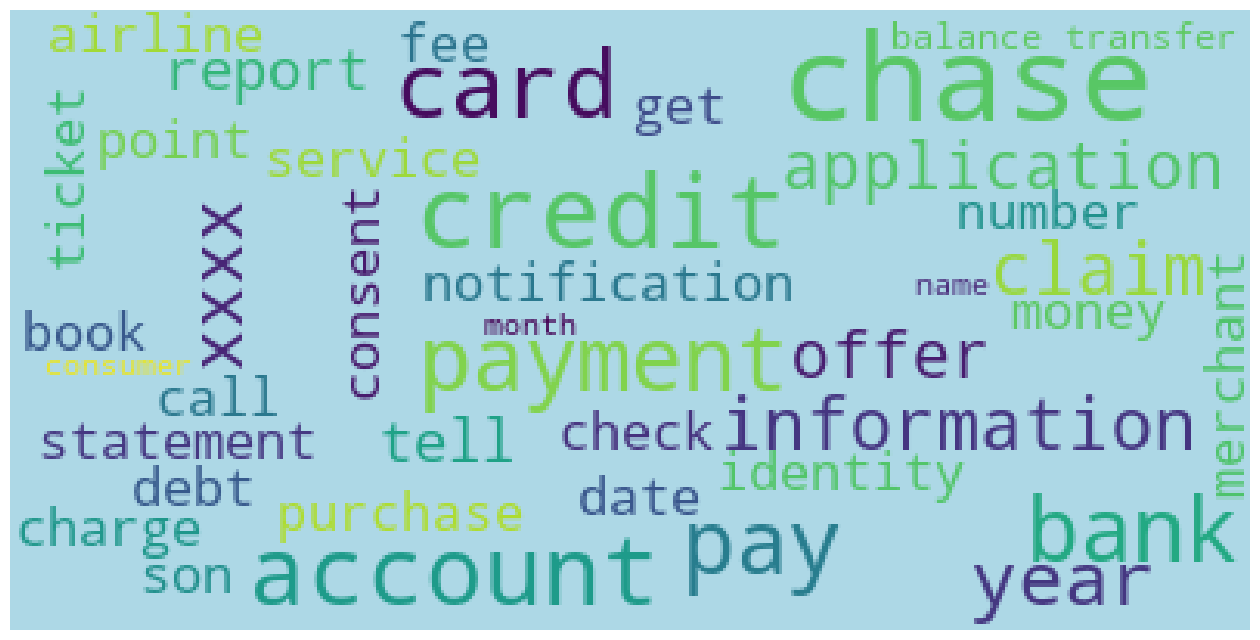

In [19]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(
                          background_color='lightblue',
                          stopwords=stop,
                          max_words=40,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_clean['complaint_POS_removed']))

fig = plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### <span style="color:navy">Observation:</span>

- WordCloud object created to find the top 40 words by frequency among all the articles after processing the text data of complaint_POS_removed col from the DataFrame.



In [20]:
# Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

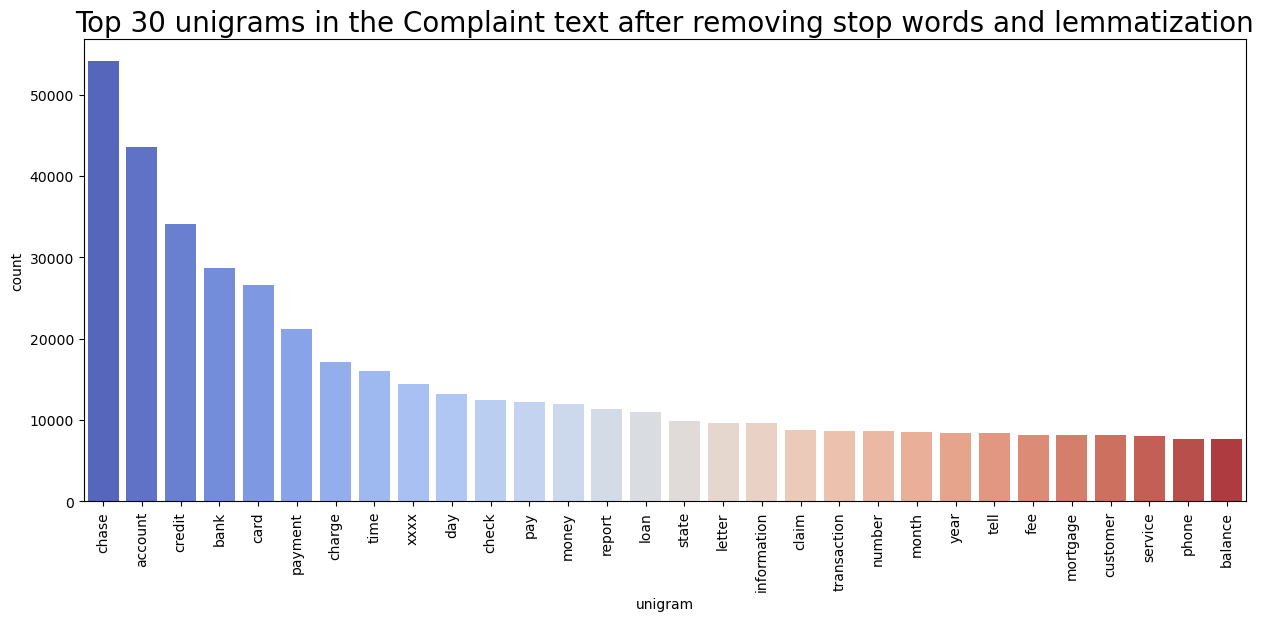

In [21]:
# Find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 unigrams by frequency among all the complaints
common_words = get_top_n_words(df_clean['complaint_POS_removed'].values.astype('U'), 30)
unigram_df = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=unigram_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 unigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [22]:
# Print the top 10 words in the unigram frequency
unigram_df.head(10)

,unigram,count
0,chase,54088
1,account,43603
2,credit,34084
3,bank,28639
4,card,26599
5,payment,21175
6,charge,17070
7,time,16065
8,xxxx,14380
9,day,13243


### <span style="color:navy">Observation:</span>
- A unigram is a single word occurring in a text, to examine individual word frequencies and distributions.
- Found top 30 unigram frequency among the complaints.



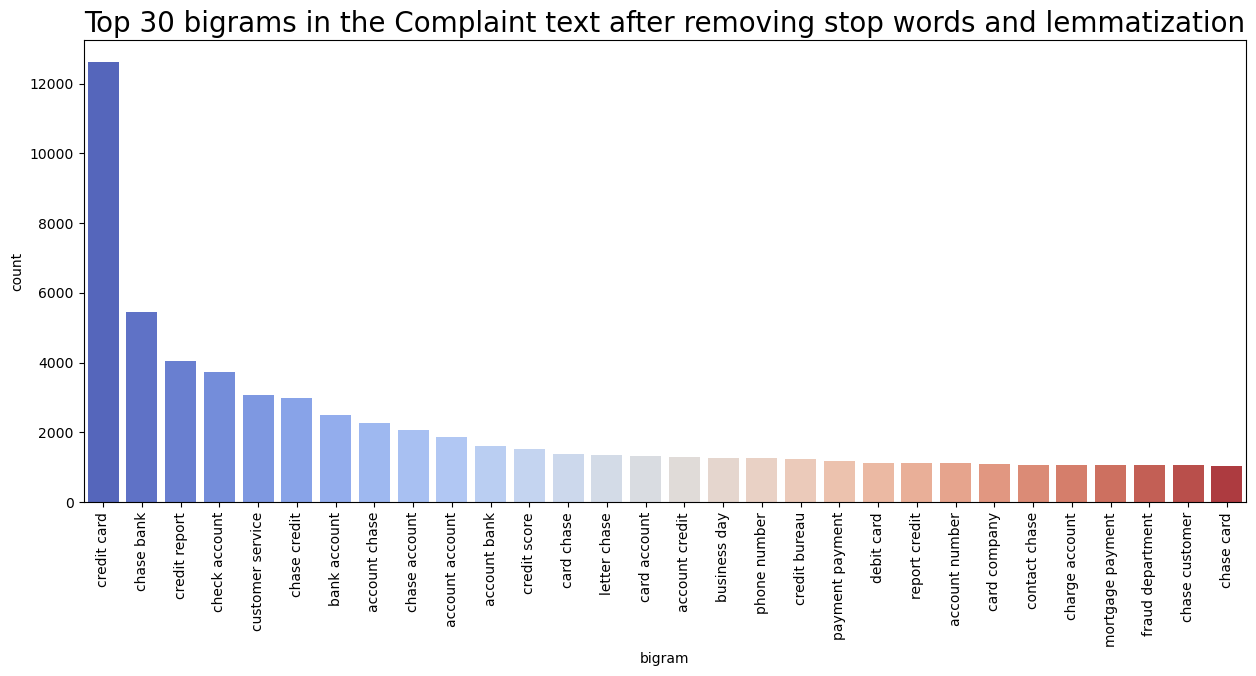

In [23]:
# Find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 bigrams by frequency among all the complaints
common_words = get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'), 30)
biagram_df = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

# Plot the top 30 bigrams
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=biagram_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 bigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [24]:
# Print the top 10 words in the bigram frequency
biagram_df.head(10)

,bigram,count
0,credit card,12610
1,chase bank,5456
2,credit report,4044
3,check account,3734
4,customer service,3074
5,chase credit,2992
6,bank account,2510
7,account chase,2284
8,chase account,2066
9,account account,1861


### <span style="color:navy">Observation:</span>
- A bigram is a sequence of two consecutive words within a text, for capturing immediate word associations and linguistic patterns.
- Found top 30 bigram frequency among the complaints.



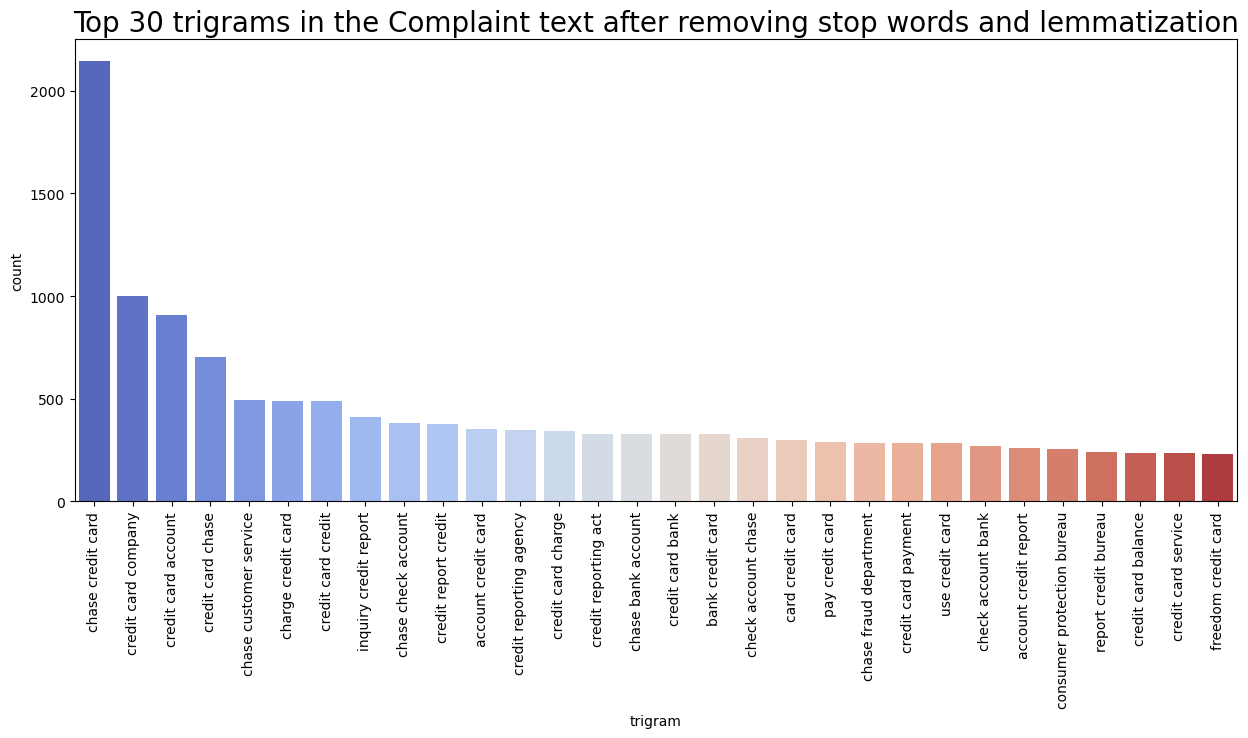

In [25]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 trigrams by frequency among all the complaints
common_words = get_top_n_trigram(df_clean['Complaint_clean'].values.astype('U'), 30)
trigram_df = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=trigram_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 trigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [26]:
# Print the top 10 words in the trigram frequency
trigram_df.head(10)

,trigram,count
0,chase credit card,2143
1,credit card company,1000
2,credit card account,906
3,credit card chase,703
4,chase customer service,494
5,charge credit card,491
6,credit card credit,490
7,inquiry credit report,411
8,chase check account,381
9,credit report credit,375


### <span style="color:navy">Observation:</span>
- A trigram is a sequence of three consecutive words within a text, for capturing contextual information and analyzing text structure.
- Found top 30 Trigram frequency among the complaints.


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [27]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [28]:
# All masked texts has been removed
df_clean.head(20)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank c

### <span style="color:navy">Observation:</span>
- All masked texts has been removed


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [29]:
# Initialise the TfidfVectorizer 

# Remove common English stop words, ignore terms occurring in over 95% or in fewer than 2 documents, 
# enhancing the quality of the generated vectors.
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [30]:
# Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean)

### <span style="color:navy">Observation:</span>


- TF-IDF vectorizer (`tfidf`) is fitted to the cleaned complaint text data (`df_clean.Complaint_clean`) and transformed it into a document-term matrix (DTM). 
- It converts the text data into a numerical format 


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task we will perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [31]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [32]:
# Load your nmf_model with the n_components i.e 5
num_topics = 5 # write the value you want to test out

# keep the random_state = 40
nmf_model = NMF(n_components=num_topics, random_state=40) 

In [33]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

7292

In [34]:
# Print the Top15 words for each of the topics
for index,topic in enumerate(nmf_model.components_):
    print(f'\033[1mThe Top 15 Words For Topic #{index + 1}', '\033[0m')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The Top 15 Words For Topic #1 
['business', 'tell', 'claim', 'transfer', 'number', 'transaction', 'branch', 'day', 'fund', 'deposit', 'chase', 'money', 'check', 'bank', 'account']


The Top 15 Words For Topic #2 
['year', 'application', 'letter', 'limit', 'debt', 'bureau', 'information', 'score', 'company', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


The Top 15 Words For Topic #3 
['bank', 'document', 'foreclosure', 'sale', 'house', 'time', 'rate', 'letter', 'year', 'property', 'modification', 'chase', 'home', 'mortgage', 'loan']


The Top 15 Words For Topic #4 
['balance', 'statement', 'pay', 'service', 'refund', 'fraud', 'claim', 'merchant', 'purchase', 'transaction', 'dispute', 'chase', 'card', 'fee', 'charge']


The Top 15 Words For Topic #5 
['mortgage', 'year', 'account', 'credit', 'chase', 'date', 'time', 'auto', 'day', 'fee', 'statement', 'month', 'balance', 'pay', 'payment']




In [35]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([0, 1, 1, ..., 3, 4, 4])

In [36]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_results.argmax(axis = 1) # assign topics to each rows.

In [37]:
df_clean.head()

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead,1
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...,1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear m

### <span style="color:navy">Observation:</span>
- Used NMF (Non-negative Matrix Factorization) model (`nmf_model`) 5 topices. 

- Fitteded the NMF model to the document-term matrix (`dtm`), which contains TF-IDF scores for terms in the complaint text data.

- Got top 15 words for each topic, 

- For each complaint, topic with the highest probability (i.e., the dominant topic) was assigned it as the topic of that complaint.

- Observed first few rows of the `df_clean` DataFrame, and it shows the assigned topics for each complaint.


In [38]:
# Print the first 5 Complaint for each of the Topics
df_clean5 = df_clean.groupby('Topic').head(5)
df_clean5.sort_values('Topic')

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,0
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,grand son give check deposit chase account fund clear chase bank close account never pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase,son check deposit chase account fund bank account money son check money bank refuse pay money son call time check owner country time date number claim number chase,163,son check deposit chase account fund bank account money son check money bank refuse pay money son call time check owner country time date number claim number chase,0
6,With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direc...,notice jp morgan chase restrict account debit card tuesday xxxx thursday xxxx go branch advise customer service representative account would actually close go branch see remove fund currently well direct deposit place employment would return bank associate customer service representative assure fund would post may take additional business day s...,jp restrict account debit card tuesday thursday branch customer service account branch fund deposit place employment bank customer service assure fund business day attempt branch fund look fund statement call tell business day state tuesday date fund bank teller chase mail check business day fund owe account bind fee rent car payment thing peac...,564,jp restrict account debit card tuesday thursday branch customer service account branch fund deposit place employment bank customer service assure fund business day attempt branch fund look fund statement call tell business day state tuesday date fund bank teller chase mail check business day fund owe account bind fee rent car payment thing peac...,0
10,mishandling of this account by Chase auto and XXXX.,mishandle account chase auto xxxx,account auto xxxx,17,account auto,0
12,I opened an account with chase bank on XXXX and used a code for XXXX bonus. I called to follow up on XX/XX/XXXX about the terms and was told everything was on the account and once I made XXXX direct deposit the bonus would be paid out in 10 days. As of XXXX I had made the required deposits and was told my account never had the coupon code appli...,

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [39]:
# Create the dictionary of Topic names and Topics
Topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan"}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [40]:
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,Bank Account services
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead,Credit card or prepaid card
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant,Credit card or prepaid card
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...,Credit card or prepaid card

### <span style="color:navy">Observation:</span>

- The dictionary with top five entries, with topics labeled from 0 to 4, replaced the integer topic labels in the "Topic" column of the `df_clean` DataFrame with their corresponding topic names

- Sucessfully transformed the numerical topic labels into descriptive topic names, making it easier to interpret and analyze the topics represented by each complaint in the dataset.


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [41]:
# Create the dictionary again of Topic names and Topics
Topic_names = {"Bank Account services":0,
               "Credit card or prepaid card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgage/Loan":4}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [42]:
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead,1
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...,1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear m

In [43]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[["complaint_what_happened","Topic"]]

In [44]:
training_data.head(10)

,complaint_what_happened,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,1
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,0
5,Can you please remove inquiry,1
6,With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direc...,0
7,"During the summer months, I experience a decline income due to my employment. Therefore, I request a one month payment extension with my Auto Loan Company, Chase. For the past almost fours years, my request for payment extension is granted. I have never been delinquent with my auto loan payment. However, On XX/XX/2019 my request for a one month...",4
8,"On XXXX XX/XX/2019, I made a {$300.00} payment to an online retailer using Chase quick pay with XXXX on the Chase website. I realized that this was a scam website after no confirmation, product, or response to any inquiries regarding the order and contacted Chase to get more information about the transaction to attempt getting a refund through ...",3
9,I have a Chase credit card which is incorrectly reporting data on my credit report. The company is not helping resolve the issue.,1


### <span style="color:navy">Observation:</span>

- The trained model will now be used to classify new complaints.

- Since supervised learning techniques require numerical inputs, the topic names are sucessfully converted to numerical values.

- Data for supervised learning is now ready

- Got `df_clean` DataFrame, containing only the "complaint_what_happened" text and the numerical topic labels.


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [45]:
# Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaint_what_happened)

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [46]:
from sklearn.model_selection import train_test_split

# Performing Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

print(f"Shape of X_train:\033[1m {X_train.shape}", '\033[0m')
print(f"Shape of y_train:\033[1m {y_train.shape}", '\033[0m')
print(f"Shape of X_test:\033[1m {X_test.shape}", '\033[0m')
print(f"Shape of y_test:\033[1m {y_test.shape}", '\033[0m')

Shape of X_train: (15804, 29725) 
Shape of y_train: (15804,) 
Shape of X_test: (5268, 29725) 
Shape of y_test: (5268,) 


### <span style="color:navy">Observation:</span>

- Training data is prepared for model training by creating vector counts using a CountVectorizer. (This step converted the text data into a matrix of token counts.)

- The word vectors are sucessfully transformed into Term Frequency-Inverse Document Frequency vectors, which represent the importance of each word in the context of the entire document corpus.

- Data splitted into training(75%) and testing sets (25%) 


We have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

### Model 1: Logistic Regression

In [47]:
# Create a function to evaluate models
def eval_model(y_test, y_pred, model_name):
    # print classification report of classifier
    plt.rcParams.update({'font.size': 8})
    print(f"\033[1mCLASSIFICATION REPORT for {model_name}\n", '\033[0m')
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"]))
    
    # plot confusion matrix of the classifier
    plt.figure(figsize=(5,5))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues", fmt='d', xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"], yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
    plt.show()
    
    return

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Run the Logistic Regression model
model_name = 'LOGISTIC REGRESSION'
clf_lr = LogisticRegression(solver='liblinear')
%time 
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [49]:
# Calculate F1 Score using weighted average method
f1_lr = f1_score(y_test, y_pred_lr, average="weighted")
f1_lr

0.9140870656538107

In [50]:
# Run Logistic Regression on tuned hyperparameters
clf_lr_tuned = LogisticRegression(C=1, penalty='l1',solver='saga')
%time 
clf_lr_tuned.fit(X_train, y_train)
y_pred_lr_tuned = clf_lr_tuned.predict(X_test)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.72 µs


In [51]:
# Calculate F1 Score of tuned model using weighted average method
f1_lr_tuned = f1_score(y_test, y_pred_lr_tuned, average="weighted")
f1_lr_tuned

0.9395764886138888

CLASSIFICATION REPORT for LOGISTIC REGRESSION
 
                             precision    recall  f1-score   support

      Bank Account services       0.94      0.94      0.94      1364
Credit card or prepaid card       0.94      0.96      0.95      1277
                     Others       0.94      0.95      0.94       917
    Theft/Dispute Reporting       0.95      0.92      0.93      1146
              Mortgage/Loan       0.93      0.91      0.92       564

                   accuracy                           0.94      5268
                  macro avg       0.94      0.94      0.94      5268
               weighted avg       0.94      0.94      0.94      5268



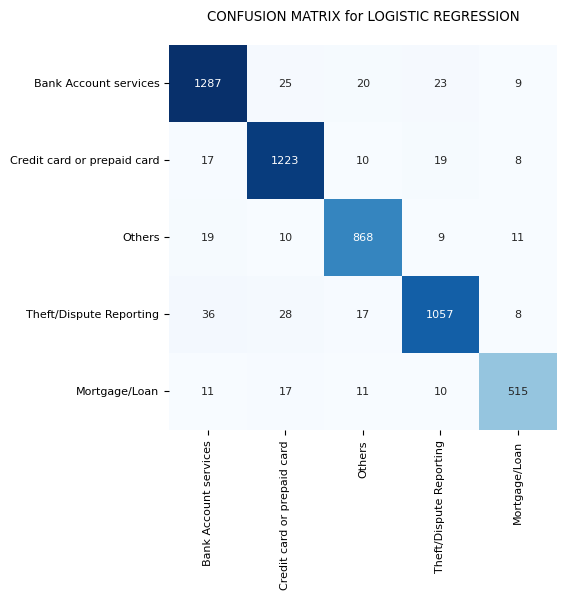

In [52]:
# Evaluate the tuned Logistic Regression classifier
eval_model(y_test, y_pred_lr_tuned, model_name)

In [53]:
# Create a dataframe to store F1 Scores of all models we will build
summary = pd.DataFrame([{'Model': 'Logistic Regression','F1 Score (untuned)': round(f1_lr, 2), 'F1 Score (tuned)': round(f1_lr_tuned, 2)}])
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.91,0.94


### <span style="color:navy">Observation:</span>

- Utilized Logistic Regression for classification (default hyperparameters).
  
- The model was finetuned using hyperparameters (`C=1`, `penalty='l1'`, `solver='saga'`) and trained again.

- Predictions made using the tuned model, and F1 score is calculated is better than default model



### Model 2: Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Run Decision Tree on default hyperparameters
model_name = 'DECISION TREE'
clf_dt = DecisionTreeClassifier()
%time 
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs


In [55]:
# Calculate F1 Score using weighted average method
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")
f1_dt

0.7770870509207629

In [56]:
# Run Decision Tree on tuned hyperparameters
clf_dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=15, max_features=None)
%time 
clf_dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = clf_dt_tuned.predict(X_test)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.3 µs


In [57]:
# Calculate F1 Score of tuned model using weighted average method
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average="weighted")
f1_dt_tuned

0.7979463101254979

CLASSIFICATION REPORT for DECISION TREE
 
                             precision    recall  f1-score   support

      Bank Account services       0.78      0.82      0.80      1364
Credit card or prepaid card       0.84      0.83      0.83      1277
                     Others       0.80      0.80      0.80       917
    Theft/Dispute Reporting       0.77      0.76      0.76      1146
              Mortgage/Loan       0.81      0.75      0.78       564

                   accuracy                           0.80      5268
                  macro avg       0.80      0.79      0.80      5268
               weighted avg       0.80      0.80      0.80      5268



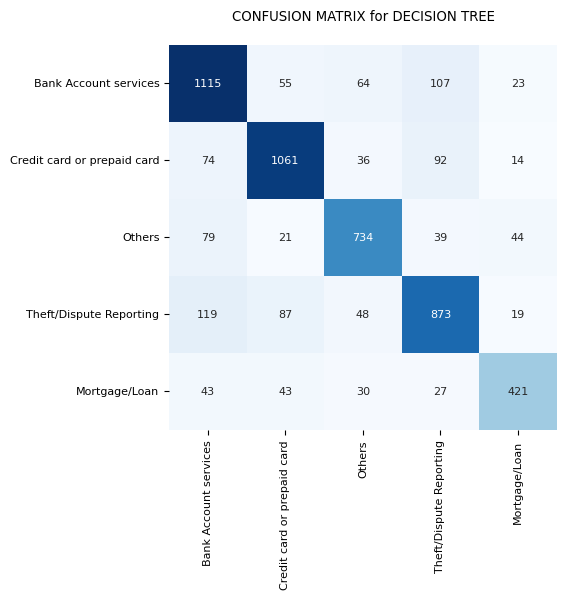

In [58]:
# Evaluate the tuned Decision Tree classifier
eval_model(y_test, y_pred_dt_tuned, model_name)

In [59]:
# Update the summary table
summary.loc[len(summary.index)] = ['Decision Tree', round(f1_dt, 2), round(f1_dt_tuned, 2)]
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.91,0.94
1,Decision Tree,0.78,0.80


### <span style="color:navy">Observation:</span>

Observations:

- Utilized Decision Tree for classification (default hyperparameters)

- The model was finetuned using hyperparameters  (`criterion='gini'`, `max_depth=30`, `min_samples_leaf=15`, `max_features=None`) and trained again.

- Predictions made using the tuned model, and F1 score is calculated is better than default model

### Model 3: Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Run the Random Forest model on default hyperparameters
model_name = 'RANDOM FOREST'
clf_rf = RandomForestClassifier()
%time 
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.06 µs


In [61]:
# Calculate F1 Score using weighted average method
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
f1_rf

0.8050829929949339

In [62]:
# Run Random Forest on tuned hyperparameters
clf_rf_tuned = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=None, max_depth=30, criterion='gini')
%time 
clf_rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = clf_rf_tuned.predict(X_test)

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 15 µs


In [63]:
# Calculate F1 Score of tuned model using weighted average method
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average="weighted")
f1_rf_tuned

0.8484080365091136

CLASSIFICATION REPORT for RANDOM FOREST
 
                             precision    recall  f1-score   support

      Bank Account services       0.86      0.85      0.86      1364
Credit card or prepaid card       0.87      0.87      0.87      1277
                     Others       0.85      0.87      0.86       917
    Theft/Dispute Reporting       0.82      0.83      0.83      1146
              Mortgage/Loan       0.82      0.79      0.81       564

                   accuracy                           0.85      5268
                  macro avg       0.85      0.84      0.84      5268
               weighted avg       0.85      0.85      0.85      5268



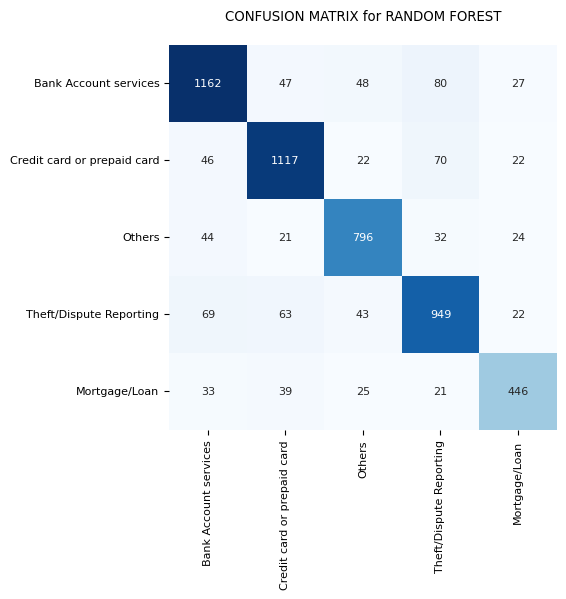

In [64]:
# Evaluate the tuned Random Forest classifier
eval_model(y_test, y_pred_rf_tuned, model_name)

In [65]:
# Update the summary table
summary.loc[len(summary.index)] = ['Random Forest', round(f1_rf, 2), round(f1_rf_tuned, 2)]
summary

,Model,F1 Score (untuned),F1 Score (tuned)
0,Logistic Regression,0.91,0.94
1,Decision Tree,0.78,0.80
2,Random Forest,0.81,0.85


### <span style="color:navy">Observation:</span>

- Utilized Random Forest for classification (default hyperparameters)

- The model was finetuned using hyperparameters  (n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=None, max_depth=30, criterion='gini') and trained again.

- Predictions made using the tuned model, and F1 score is calculated is better than default model

#### From the above summary table, we observe that the `tuned Logistic Regression` performs the best among all that we tried.

In [66]:
# Function to predict a topic for given text
def predict_topic(text):
    
    target_names = ["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]

    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = clf_lr_tuned.predict(X_new_tfidf)

    return target_names[predicted[0]]

In [67]:
# Create a dataframe of some sample customer complaints

df_new = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})
df_new

,complaints
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs"
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.
2,I want to open a salary account at your downtown branch. Please provide me the procedure.
3,"Yesterday, I received a fraudulent email regarding renewal of my services."
4,What is the procedure to know my CIBIL score?
5,I need to know the number of bank branches and their locations in the city of Dubai


In [68]:
# Create a new column of predicted topics of each complaint, predicted using the tuned Logistic Regression model
df_new['predicted topic'] = df_new['complaints'].apply(lambda x: predict_topic([x]))
df_new

,complaints,predicted topic
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Others
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Credit card or prepaid card
2,I want to open a salary account at your downtown branch. Please provide me the procedure.,Bank Account services
3,"Yesterday, I received a fraudulent email regarding renewal of my services.",Theft/Dispute Reporting
4,What is the procedure to know my CIBIL score?,Others
5,I need to know the number of bank branches and their locations in the city of Dubai,Bank Account services


### <span style="color:navy">Observation:</span>

- Finally, `df_new` displayed the newly added 'predicted topic' and its as expected.
